In [1]:
from data_pre_processing import DataPreProcessing as dpp

In [2]:
dpp = dpp()
dpp.load_data("data")
df = dpp.get_data()
df['bitcoin']

,Date,Open,High,Low,Close,Volume,Currency
0,733971,0.0,0.1,0.1,0.1,75,USD
1,733972,0.1,0.1,0.1,0.1,574,USD
2,733973,0.1,0.1,0.1,0.1,262,USD
3,733974,0.1,0.1,0.1,0.1,575,USD
4,733975,0.1,0.1,0.1,0.1,2160,USD
...,...,...,...,...,...,...,...
4415,738386,23201.6,23202.3,20807.8,20831.3,339472,USD
4416,738387,20830.7,21357.4,20784.8,21138.9,206943,USD
4417,738388,21138.9,21692.4,21077.4,21517.2,177522,USD
4418,738389,21516.8,21517.4,20912.1,21416.3,251833,USD


In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np

## Test model on BTC

In [5]:
from sklearn.model_selection import train_test_split


X = df['bitcoin'][['Date', 'Open', 'High', 'Low', 'Volume']]
y = df['bitcoin']['Close']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3536, 5), (884, 5), (3536,), (884,))

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
def mape_vectorized_v2(a, b): 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression(copy_X=True, n_jobs=-1).fit(x_train, y_train)
y_pred = model.predict(x_train)

train_mse = mean_squared_error(y_train, y_pred)
train_r2 = r2_score(y_train, y_pred)
train_mape = mape_vectorized_v2(y_train, y_pred)

print(f"Train MSE: {train_mse}")
print(f"Train R2: {train_r2}")
print(f"Train MAPE: {train_mape}")

Train MSE: 73537.13494032854
Train R2: 0.9996433153264435
Train MAPE: 1.2323318590846721


In [9]:
df_pred = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred, 'Date': x_train[:,0]})
df_pred.sort_values(by='Date', inplace=True)
df_pred

,Actual,Predicted,Date
0,0.1,-3.880794,-1.745528
1,0.1,-3.929412,-1.744740
2,0.1,-3.925300,-1.743952
3,0.1,-3.921232,-1.743164
4,0.1,-3.917252,-1.742376
...,...,...,...
4412,23856.8,23842.208568,1.731723
4413,23338.0,23831.108139,1.732511
4414,23203.6,23298.668229,1.733299
4415,20831.3,21607.784068,1.734087


<Axes: >

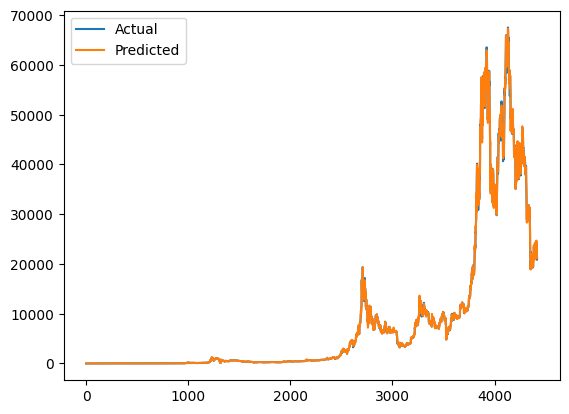

In [10]:
df_pred[['Actual', 'Predicted']].plot()